# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.datasets as DT
import numpy.random as rd
import tensorflow.keras.utils as ut
import tensorflow.keras.models as md
import tensorflow.keras.layers as ly


In [2]:
import tensorflow as tf


In [3]:
tf.__version__


'2.11.0'

## Import Data

In [4]:
(X1, y1), (X2, y2) = DT.fashion_mnist.load_data()
print("Training set:", X1.shape, X1.dtype)
print("Test set:    ", X2.shape, X2.dtype)


Training set: (60000, 28, 28) uint8
Test set:     (10000, 28, 28) uint8


### View some images

(-0.5, 619.5, 309.5, -0.5)

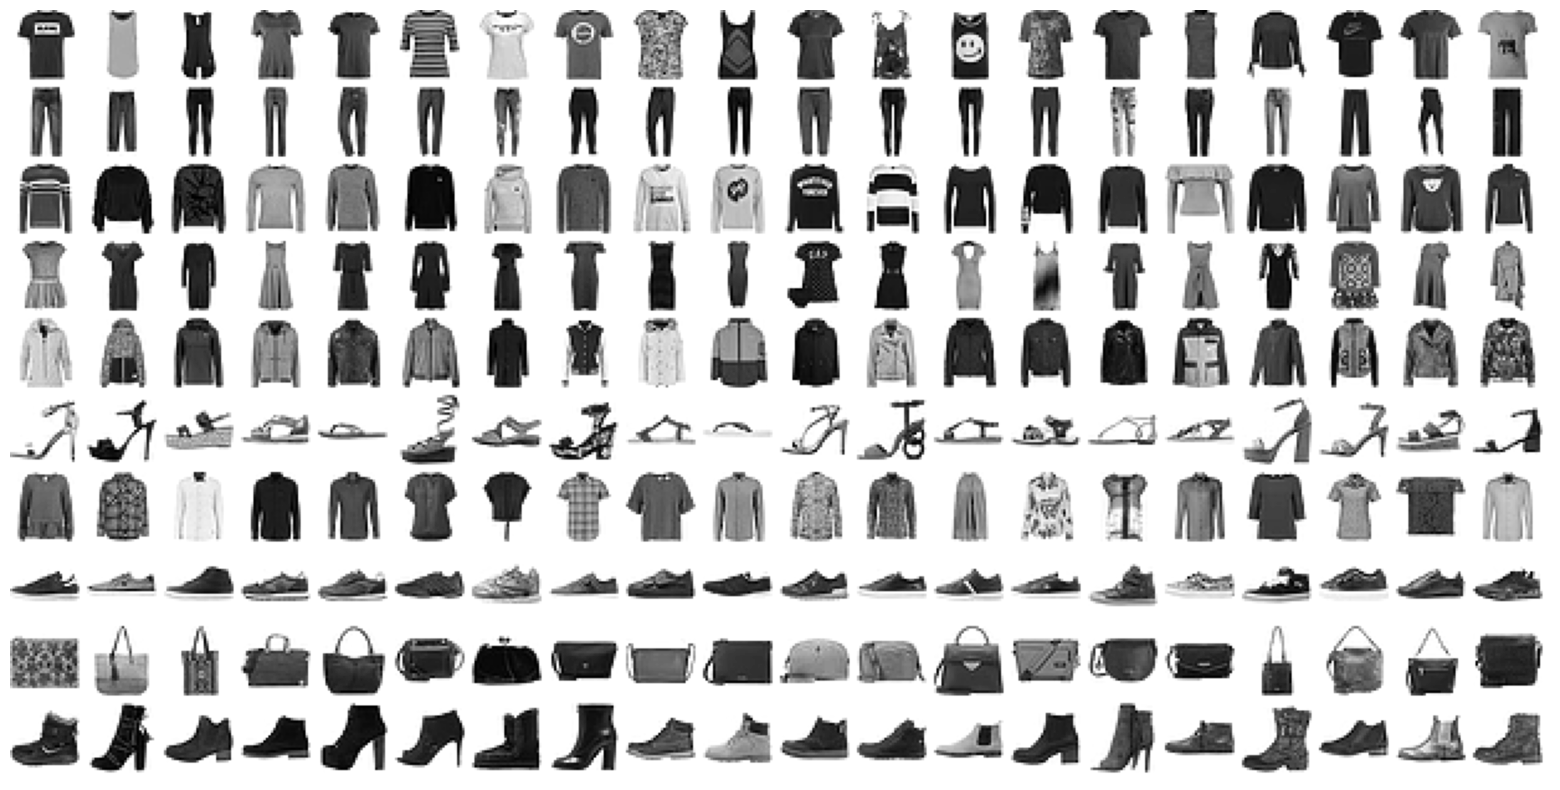

In [5]:
idxList = []
for i in range(10):
    idxTemp = np.argwhere(y1 == i).squeeze()
    idxList.append(idxTemp)


for i in range(10):
    idx = idxList[i]
    for n in range(20):
        if n == 0:
            Img = np.hstack((255 - X1[idx[n]], np.ones((28, 3)) * 255))
        else:
            Img = np.hstack((Img, 255 - X1[idx[n]], np.ones((28, 3)) * 255))

    if i == 0:
        Img = np.hstack((255 - X1[idx[n]], np.ones((28, 3)) * 255))
        ImgT = np.vstack((Img, np.ones((3, Img.shape[1])) * 255))
    else:
        ImgT = np.vstack((ImgT, Img, np.ones((3, Img.shape[1])) * 255))

plt.figure(figsize=(20, 10))
plt.imshow(ImgT, cmap="gray")
plt.axis("off")


# NN

In [9]:
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
nn.add(tf.keras.layers.Dense(128, activation="tanh"))
nn.add(tf.keras.layers.Dense(10, activation="softmax"))
nn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y2 = keras.utils.to_categorical(y2, 10)
y1 = keras.utils.to_categorical(y1, 10)

nn.fit(X1, y1, epochs=10, 
       batch_size=32, validation_data=(X2, y2))

## Shuffle training set and sort test set

In [6]:
idx = rd.permutation(X1.shape[0])
X1 = X1[idx]
y1 = y1[idx]


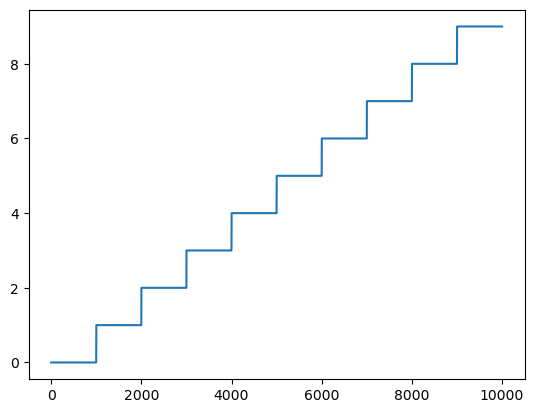

In [7]:
idx = np.argsort(y2)
y2 = y2[idx]
X2 = X2[idx]
plt.plot(y2)


## Images must be in vector format (make sure that data is in "float" format)

In [8]:
X1 = X1.reshape((60000, 28**2)) * 1.0
X2 = X2.reshape((X2.shape[0], 28**2)) * 1.0
print("Training set:", X1.shape, X1.dtype)
print("Test set:    ", X2.shape, X2.dtype)


Training set: (60000, 784) float64
Test set:     (10000, 784) float64


## Train, predict and check confusion matrix - use SGDClassifier (try others)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier().fit(X1, y1)
y2e = sgd.predict(X2)


In [10]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y2, y2e))
print("Total number of erros %d (in %d)" % (np.sum(y2 != y2e), X2.shape[0]))


[[705  23  12  38  58   1 149   0  13   1]
 [  1 968   2  12   9   0   4   1   2   1]
 [ 20   8 649   8 238   0  64   0  13   0]
 [ 12  56  15 742 133   0  38   1   2   1]
 [  0   4  70  16 869   0  40   0   1   0]
 [  2   2   2   1   2 868   0  55  30  38]
 [102  16  97  39 209   0 506   0  31   0]
 [  0   0   0   0   0  25   0 950   5  20]
 [  7   2   4   7  14   8  12   5 941   0]
 [  0   0   2   0   1  11   2  57   4 923]]
Total number of erros 1879 (in 10000)


## Since test set is ordered, one can also check erros visually

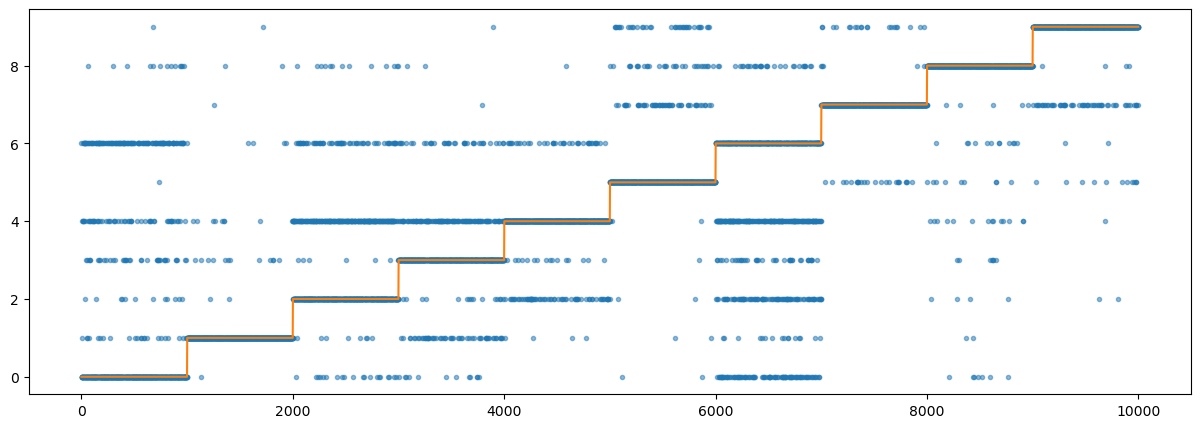

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(y2e, ".", alpha=0.5)
plt.plot(y2)


## Possible problem: different means and variances of each of the 784 data dimensions

Text(0.5, 1.0, 'Standard Deviations')

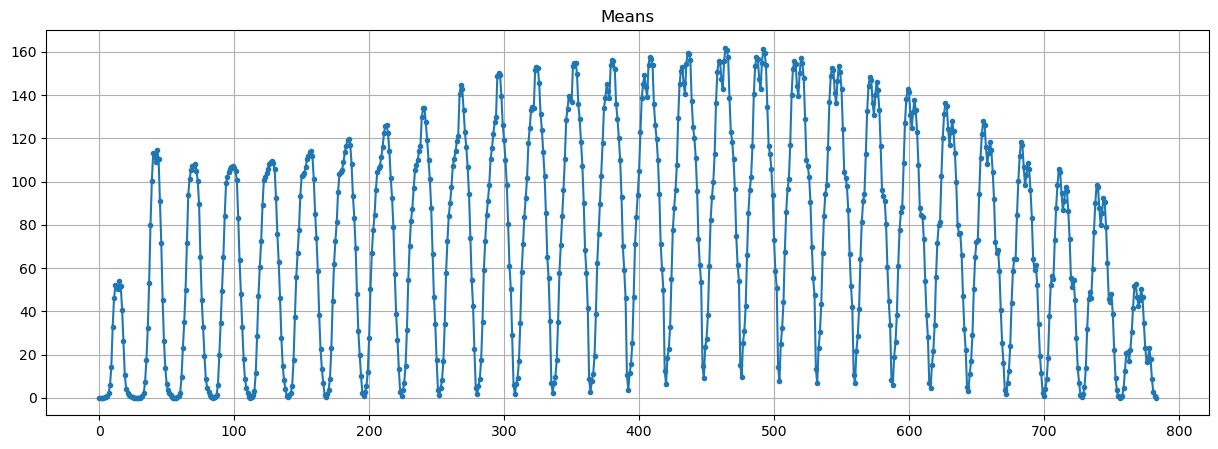

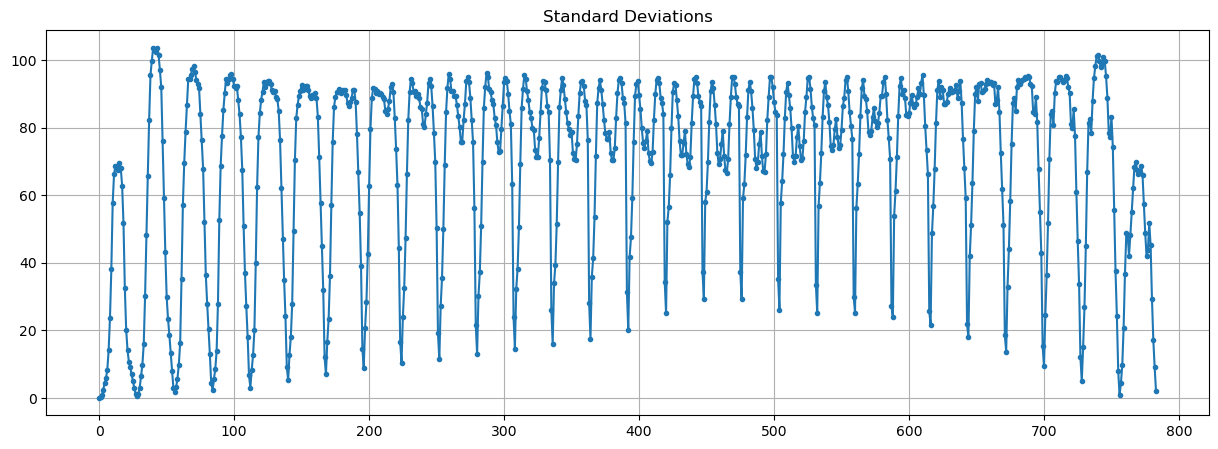

In [12]:
m = np.mean(X1, axis=0)
plt.figure(figsize=(15, 5))
plt.plot(m, ".-")
plt.grid(True)
plt.title("Means")

s = np.std(X1, axis=0)
plt.figure(figsize=(15, 5))
plt.plot(s, ".-")
plt.grid(True)
plt.title("Standard Deviations")


## Pre-process data (0 mean and unit variance in each dimension)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X1)
X1s = sc.transform(X1)
X2s = sc.transform(X2)


In [14]:
sgd = SGDClassifier().fit(X1s, y1)
y2e = sgd.predict(X2s)
print(confusion_matrix(y2, y2e))
print("Total number of erros %d (in %d)" % (np.sum(y2 != y2e), X2.shape[0]))


[[755   4  13  78   5   0 126   0  19   0]
 [  1 945   5  34   5   0   9   0   1   0]
 [  8   1 711  18 122   0 128   0  12   0]
 [ 29   8  13 872  25   0  50   0   3   0]
 [  1   0 123  58 703   0 114   0   1   0]
 [  1   0   0   0   0 906   2  50  14  27]
 [129   2 110  77  86   0 556   1  39   0]
 [  0   0   0   0   0  33   0 931   2  34]
 [  5   1   2  15   3   1  33   5 935   0]
 [  0   0   1   2   0  15   0  38   1 943]]
Total number of erros 1743 (in 10000)


C:\Users\ruben\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## Pre-process data with PCA - use different values for total variance
## Repeat the process with the normalized data (StandarScaler) to check if it is better

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9, whiten=True).fit(X1)
X1p = pca.transform(X1)
X2p = pca.transform(X2)
print("Nº of Principal Components kept: %d" % X1p.shape[1])


Nº of Principal Components kept: 84


In [16]:
sgd = SGDClassifier().fit(X1p, y1)
y2e = sgd.predict(X2p)
print(confusion_matrix(y2, y2e))
print("Total number of erros %d (in %d)" % (np.sum(y2 != y2e), X2.shape[0]))


[[749   3  19  80  17   1 109   0  22   0]
 [  4 948  10  26   6   0   3   1   2   0]
 [ 16   2 730  12 136   0  93   0  11   0]
 [ 24  15  12 860  43   0  44   0   2   0]
 [  2   2 118  40 713   0 117   0   8   0]
 [  3   0   3   2   1 907   1  52   9  22]
 [139   6 129  55 113   0 523   0  35   0]
 [  0   0   0   0   0  42   2 903   1  52]
 [  4   1  12  16   4   7  23   5 928   0]
 [  2   0   1   0   0  18   1  30   1 947]]
Total number of erros 1792 (in 10000)


# Binary classification problem (positives are class 3 - dresses)

### Change labels

In [6]:
y1b = (y1 == 3) * 1
y2b = (y2 == 3) * 1


### Train and test

In [11]:
import numpy.random as rd
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier().fit(X1p, y1b)
y2e = sgd.predict(X2p)
print(confusion_matrix(y2b, y2e))
print("Total number of erros %d (in %d)" % (np.sum(y2b != y2e), y2b.shape[0]))


NameError: name 'X1p' is not defined

In [10]:
r1 = np.sum(y2e[y2b == 1] == 1) / (
    np.sum(y2e[y2b == 1] == 1) + np.sum(y2e[y2b == 1] == 0)
)  # recall
p1 = np.sum(y2e[y2b == 1] == 1) / (
    np.sum(y2e[y2b == 1] == 1) + np.sum(y2e[y2b == 0] == 1)
)  # precision
f1 = np.sum(y2e[y2b == 0] == 1) / (
    np.sum(y2e[y2b == 0] == 0) + np.sum(y2e[y2b == 0] == 1)
)  # fp-rate
print("Recall: %3f - Precision: %3f - FP-rate: %3f" % (r1, p1, f1))


NameError: name 'y2e' is not defined

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y2b, y2e))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9000
           1       0.82      0.81      0.81      1000

    accuracy                           0.96     10000
   macro avg       0.90      0.89      0.90     10000
weighted avg       0.96      0.96      0.96     10000



# Model Calibration (changing decision threshold)

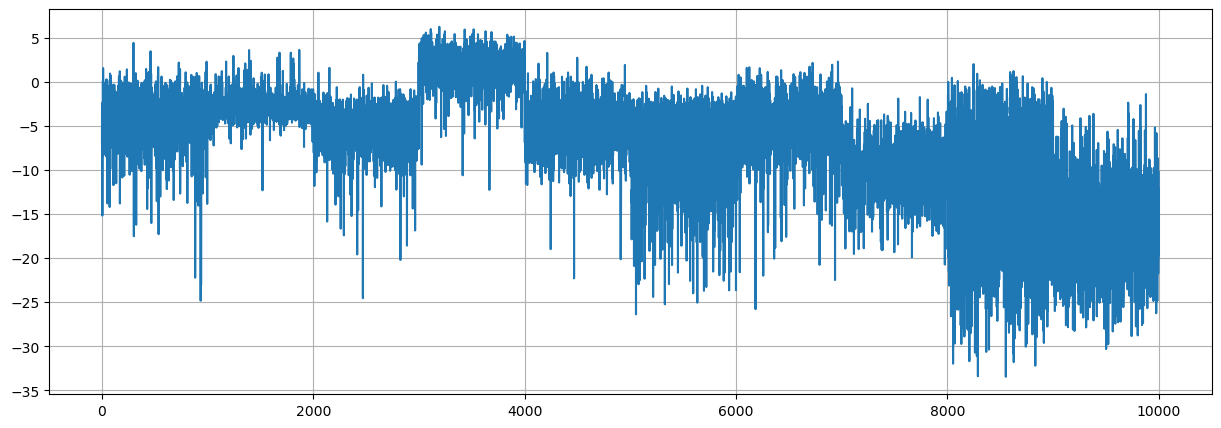

In [ ]:
r2e = sgd.decision_function(X2p)
plt.figure(figsize=(15, 5))
plt.plot(r2e)
plt.grid(True)


In [ ]:
print(confusion_matrix(y2b, (r2e >= 0) * 1))  # default threshold
print(
    "Total number of erros %d (in %d)" % (np.sum(y2b != (r2e >= 0) * 1), y2b.shape[0])
)


[[8826  174]
 [ 195  805]]
Total number of erros 369 (in 10000)


## Change threshold - reduce the false negatives

In [ ]:
lim2 = -0.191
y2eB = (r2e > lim2) * 1
print(confusion_matrix(y2b, y2eB))
print("Total number of erros %d (in %d)" % (np.sum(y2b != y2eB), y2b.shape[0]))


[[8788  212]
 [ 164  836]]
Total number of erros 376 (in 10000)


In [ ]:
r2 = np.sum(y2eB[y2b == 1] == 1) / (
    np.sum(y2eB[y2b == 1] == 1) + np.sum(y2eB[y2b == 1] == 0)
)
p2 = np.sum(y2eB[y2b == 1] == 1) / (
    np.sum(y2eB[y2b == 1] == 1) + np.sum(y2eB[y2b == 0] == 1)
)
f2 = np.sum(y2eB[y2b == 0] == 1) / (
    np.sum(y2eB[y2b == 0] == 0) + np.sum(y2eB[y2b == 0] == 1)
)
print("Recall: %3f - Precision: %3f - FP-rate: %3f" % (r2, p2, f2))


Recall: 0.836000 - Precision: 0.797710 - FP-rate: 0.023556


In [ ]:
lim3 = -1.75
y2eC = (r2e > lim3) * 1
print(confusion_matrix(y2b, y2eC))
print("Total number of erros %d (in %d)" % (np.sum(y2b != y2eC), y2.shape[0]))
r3 = np.sum(y2eC[y2b == 1] == 1) / (
    np.sum(y2eC[y2b == 1] == 1) + np.sum(y2eC[y2b == 1] == 0)
)
p3 = np.sum(y2eC[y2b == 1] == 1) / (
    np.sum(y2eC[y2b == 1] == 1) + np.sum(y2eC[y2b == 0] == 1)
)
f3 = np.sum(y2eC[y2b == 0] == 1) / (
    np.sum(y2eC[y2b == 0] == 0) + np.sum(y2eC[y2b == 0] == 1)
)
print("Recall: %3f - Precision: %3f - FP-rate: %3f" % (r3, p3, f3))


[[8242  758]
 [  56  944]]
Total number of erros 814 (in 10000)
Recall: 0.944000 - Precision: 0.554642 - FP-rate: 0.084222


# ROC curve + Precision-recall curve - 3 thresholds

In [ ]:
import sklearn.metrics as skm


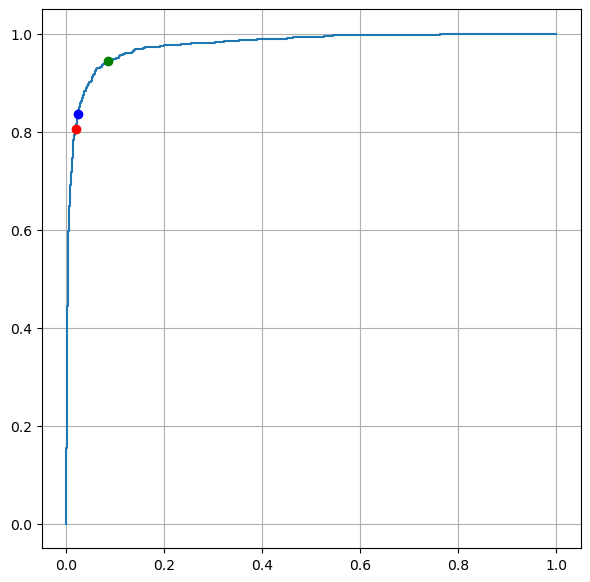

In [ ]:
fp, tp, t = skm.roc_curve(y2b, r2e)

plt.figure(figsize=(7, 7))
plt.plot(fp, tp)
plt.plot(f1, r1, "or")
plt.plot(f2, r2, "ob")
plt.plot(f3, r3, "og")

plt.axis("scaled")
plt.grid(True)


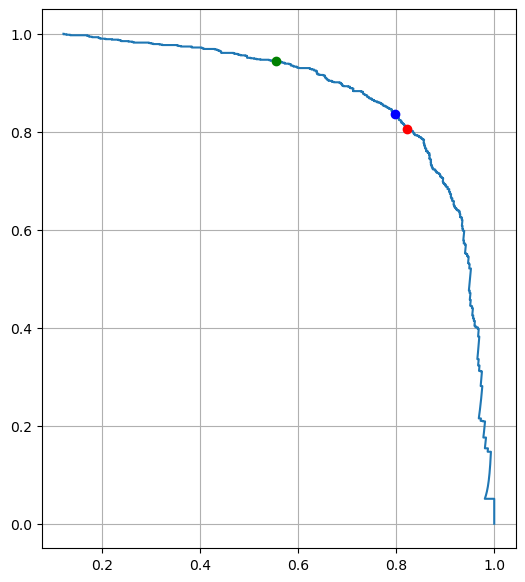

In [ ]:
pre, rec, lim = skm.precision_recall_curve(y2b, r2e)
plt.figure(figsize=(7, 7))
plt.plot(pre, rec)
plt.plot(p1, r1, "or")
plt.plot(p2, r2, "ob")
plt.plot(p3, r3, "og")

plt.axis("scaled")
plt.grid(True)


## Precion, Recall and F-score  for the thresholds used

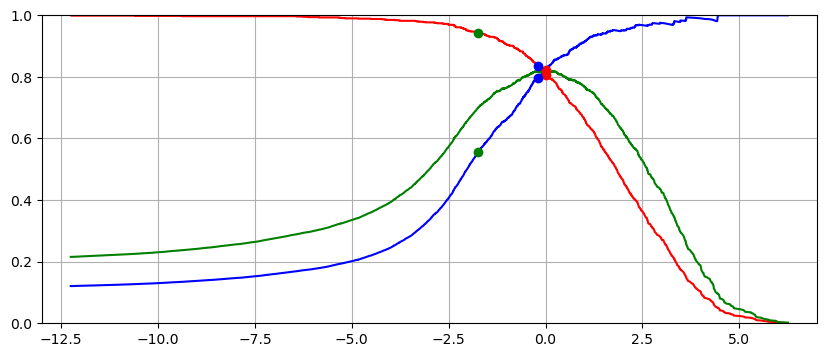

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(lim, pre[:-1], "b")
plt.plot(lim, rec[:-1], "r")
fsc = 2 * pre * rec / (pre + rec)
plt.plot(lim, fsc[:-1], "g")

# plt.plot(0, p1, "or")
# plt.plot(0, r1, "or")
# plt.plot(lim2, p2, "ob")
# plt.plot(lim2, r2, "ob")
# plt.plot(lim3, p3, "og")
# plt.plot(lim3, r3, "og")

plt.axis([np.floor(lim.min()), np.ceil(lim.max()), 0, 1])
plt.grid(True)


In [30]:
np.floor(lim.min())


-13.0

## Model Comparison (try another classifier)

In [31]:
from sklearn.ensemble import RandomForestClassifier

RandF = RandomForestClassifier().fit(X1p, y1b)
y2f = RandF.predict(X2p)
print(confusion_matrix(y2b, y2f))
print("Total number of erros %d (in %d)" % (np.sum(y2b != y2f), y2b.shape[0]))


[[8945   55]
 [ 230  770]]
Total number of erros 285 (in 10000)


In [32]:
r2f = RandF.predict_proba(X2p)[:, 1]
yB = (r2f > 0.5) * 1  # default threshold
print(confusion_matrix(y2b, yB))
print("Total number of erros %d (in %d)" % (np.sum(y2b != yB), y2b.shape[0]))


[[8945   55]
 [ 230  770]]
Total number of erros 285 (in 10000)


Recall: 0.836000 - Precision: 0.797710 - FP-rate: 0.023556


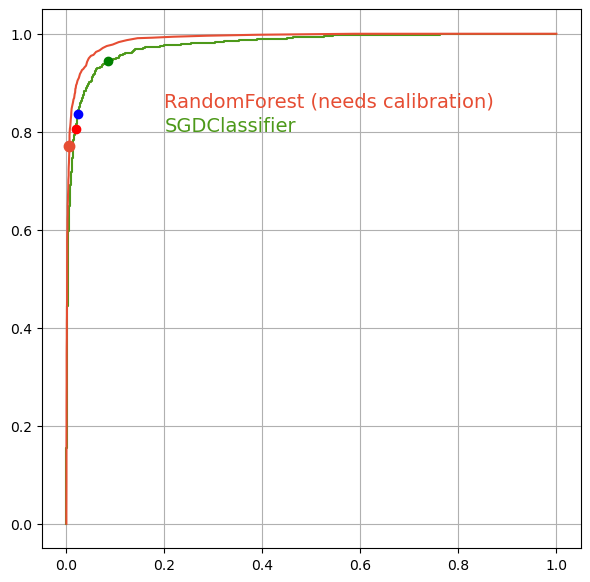

In [33]:
fp, tp, t = skm.roc_curve(y2b, r2e)

plt.figure(figsize=(7, 7))
plt.plot(fp, tp, color=[0.3, 0.6, 0.1])
plt.text(0.2, 0.8, "SGDClassifier", fontsize=14, color=[0.3, 0.6, 0.1])

plt.plot(f1, r1, "or")
plt.plot(f2, r2, "ob")
plt.plot(f3, r3, "og")

fp2, tp2, t2 = skm.roc_curve(y2b, r2f)
r4 = np.sum(yB[y2b == 1] == 1) / (np.sum(yB[y2b == 1] == 1) + np.sum(yB[y2b == 1] == 0))
p4 = np.sum(yB[y2b == 1] == 1) / (np.sum(yB[y2b == 1] == 1) + np.sum(yB[y2b == 0] == 1))
f4 = np.sum(yB[y2b == 0] == 1) / (np.sum(yB[y2b == 0] == 0) + np.sum(yB[y2b == 0] == 1))
print("Recall: %3f - Precision: %3f - FP-rate: %3f" % (r2, p2, f2))
plt.plot(fp2, tp2, color=[0.9, 0.3, 0.2])
plt.text(
    0.2, 0.85, "RandomForest (needs calibration)", fontsize=14, color=[0.9, 0.3, 0.2]
)

plt.plot(f4, r4, ".", ms=15, color=[0.9, 0.3, 0.2])
plt.axis("scaled")
plt.grid(True)
